In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ipywidgets import (interact,
                        interactive)

In [9]:
def modelo_logistico(r=5, K=100):
    plt.figure()
    x = np.linspace(0, K, num=1000)
    plt.ylim(0, r*K/4+2)
    plt.plot(x, r*x*(1-x/K))
    plt.show()

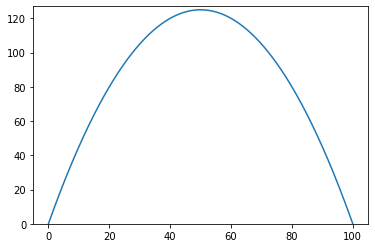

In [10]:
modelo_logistico()

Quiero que grafiquen estas dos funciones:

$$F(N|r, K) = rN(1-\frac{N}{K}) $$

$$H(N|q, E) = qEN$$

In [20]:
def modelo_con_pesca(q, E, r=5, K=100):
    plt.figure()
    x = np.linspace(0, K, num=1000)
    puntos_equilibrio = np.array([
        [0, 0],
        [K*(1-q*E/r), 0]
    ])
    plt.ylim(0, r*K/4+2)
    plt.plot(x, r*x*(1-x/K))
    plt.plot(x, q*E*x)
    plt.scatter(puntos_equilibrio[:, 0], puntos_equilibrio[:, 1], c='r')

    plt.show()

interactive_plot = interactive(modelo_con_pesca, q=(0., 1.), E=(0.,30.))
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='q', max=1.0), FloatSlider(value=15.0, description='E…

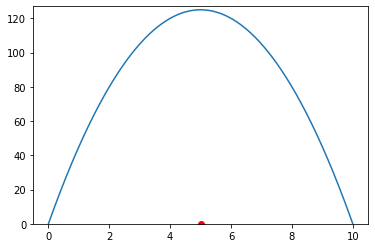

In [27]:
def rendimiento_h2(q=0.5, E=3., r=5, K=100):
    plt.figure()
    E = np.linspace(0, r/q, num=1000)
    plt.ylim(0, r*K/4+2)
    plt.plot(E, q*E*K*(1-q*E/r))
    plt.scatter(r/(2*q), 0, c='red')
    plt.show()

rendimiento_h2()